In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from collections import Counter
rcParams['figure.figsize'] = 14,6

%matplotlib inline

In [ ]:
def load_and_subset_trajectories(file_name, num_traj=300):

    df = pd.read_csv(file_name)
    #drop missing value
    df = df.dropna()
    df = df.reset_index(drop=True)
    # the whole dataset is too big to open here.
    # Let's subset to fewer random trajectories:
#     for i in df:
#         if df['land']>0 and df['temp'] !=0:
#             df['temp'] = 0
#     df = df.loc[(df["land"] > 0) & (df["temp"] != 0)] #drop rows that land > 0 and temp is not 0
#     df["time"] = df["time"].pipe(convert_formats_to_datetimes, formats)
    
#    choose random trajectories 
    random_trajs = np.random.choice(
        np.unique(df["traj"]), num_traj, replace=False
    )
    traj_mask = df["traj"].apply(lambda x: x in random_trajs)
    df = df[traj_mask]
#    choose trajectories based on certain period of time
    
    
    return df

In [61]:
data = pd.read_csv('march.csv')

# df.rename(columns={"lat": "x","lon": "y"},inplace=True)
df = data.loc[data['obs'] < 24].copy()
selected_columns = df[["lat","lon","time"]]
n_df = selected_columns.copy()
n_df

,lat,lon,time
0,43.288517,5.171321,2017-03-01 00:00:00
1,43.296562,4.982898,2017-03-05 00:00:00
2,43.294650,4.962841,2017-03-10 00:00:00
3,43.280422,5.100956,2017-03-14 00:00:00
4,43.294853,5.134313,2017-03-19 00:00:00
...,...,...,...
48715,36.733727,-1.637864,2017-03-23 23:00:00
48716,36.716335,-2.066488,2017-03-25 23:00:00
48717,37.008602,-1.777075,2017-03-27 23:00:00
48718,36.886290,-1.952840,2017-03-29 23:00:00


In [62]:
n_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48720 entries, 0 to 48719
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     48720 non-null  float64
 1   lon     48720 non-null  float64
 2   time    48720 non-null  object 
dtypes: float64(2), object(1)
memory usage: 1.5+ MB


In [63]:
data

,obs,traj,MPA,distance,land,lat,lon,temp,time,z
0,0,0,1.0,0.00000,0.000000,43.288517,5.171321,13.421764,2017-03-01 00:00:00,1.018237
1,0,1,1.0,0.00000,0.000000,43.296562,4.982898,12.984367,2017-03-05 00:00:00,1.018237
2,0,2,1.0,0.00000,0.000000,43.294650,4.962841,13.468207,2017-03-10 00:00:00,1.018237
3,0,3,1.0,0.00000,0.000000,43.280422,5.100956,13.317587,2017-03-14 00:00:00,1.018237
4,0,4,1.0,0.00000,0.000000,43.294853,5.134313,13.718286,2017-03-19 00:00:00,1.018237
...,...,...,...,...,...,...,...,...,...,...
779491,743,9180,0.0,760.41320,0.000000,36.750824,1.234207,15.911005,2017-03-31 23:00:00,1.018237
779492,743,9741,10.0,805.02730,0.936216,35.916252,0.077910,1.040119,2017-03-31 23:00:00,1.018237
779493,743,9811,10.0,424.15085,0.677286,35.075947,-2.248944,5.438546,2017-03-31 23:00:00,1.018237
779494,743,9881,10.0,414.81730,0.999941,35.221684,-1.583336,0.000952,2017-03-31 23:00:00,1.018237


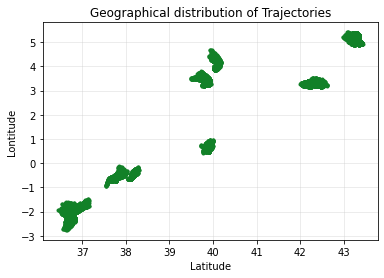

In [64]:
_ = plt.plot(n_df['lat'],n_df['lon'], marker='.', linewidth=0, color='#128128')
_ = plt.grid(which='major', color='#cccccc', alpha=0.45)
_ = plt.title('Geographical distribution of Trajectories', family='Arial',fontsize=12)
_ = plt.xlabel('Latitude')
_ = plt.ylabel('Lontitude')
_ = plt.show()

In [65]:
dbscan_data = n_df[['lat','lon']]
dbscan_data = dbscan_data.values.astype('float32',copy=False)
dbscan_data


array([[43.288517 ,  5.171321 ],
       [43.296562 ,  4.9828978],
       [43.29465  ,  4.962841 ],
       ...,
       [37.008602 , -1.7770749],
       [36.88629  , -1.9528403],
       [36.78294  , -2.0615764]], dtype=float32)

In [66]:
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
dbscan_data 

array([[ 1.5175915,  1.3090818],
       [ 1.5209985,  1.2403255],
       [ 1.5201892,  1.2330066],
       ...,
       [-1.1418393, -1.2264167],
       [-1.1936357, -1.2905542],
       [-1.2374032, -1.3302324]], dtype=float32)

In [67]:
'''
    min_samples: min # of data points in a neighborhood
    eps: in radius
'''

model = DBSCAN(eps = 0.1, min_samples = 10, metric='euclidean').\
    fit(dbscan_data)
model

DBSCAN(eps=0.1, min_samples=10)

In [68]:
#separate outliers from clustered data
outliers_df = n_df[model.labels_ == -1]
clusters_df = n_df[model.labels_ != -1]

colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'

#get info about the clusters
clusters = Counter(model.labels_)
print(clusters)
print(n_df[model.labels_ == -1].head())
print('Number of clusters = {}'.format(len(clusters)-1))

Counter({6: 13632, 1: 8280, 3: 7752, 0: 6600, 5: 4752, 4: 4176, 2: 3528})
Empty DataFrame
Columns: [lat, lon, time]
Index: []
Number of clusters = 6


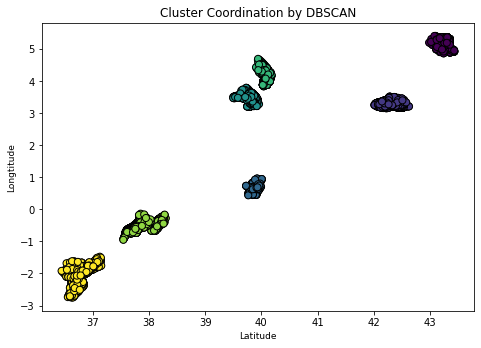

In [69]:
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

ax.scatter(clusters_df['lat'],clusters_df['lon'], c = colors_clusters, edgecolor = 'black', s=50)
# ax.scatter(outliers_df['lat'],outliers_df['lon'], c = colors_clusters, edgecolor = 'black', s=50)

ax.set_xlabel('Latitude', fontsize = 9)
ax.set_ylabel('Longtitude', fontsize = 9)

plt.title('Cluster Coordination by DBSCAN', fontsize=12)

# plt.grid(which='major', color='#cccccc', alpha=0.45)

plt.show()